Import file csv dataset yang sudah dibersikah attribute yang tidak perlu.
Kolom hanya terdiri dari nama, text, dan bintang<br>
note : belum didropduplicate

In [44]:
import pandas as pd
import re
phase2 = pd.read_csv('reviewset.csv')

Penghitungan bintang tiap kategori

In [45]:
phase2.star.value_counts()

5    25954
4    12631
3     5826
1     1135
2     1089
Name: star, dtype: int64

In [118]:
phase2.star.value_counts()

5    20934
4     9023
3     4376
1      881
2      834
Name: star, dtype: int64

In [46]:
phase2

,name,text,star
0,Dwi Widjanarkoir,Sudah lama nggak ke sini,4
1,Nugi Tiartanto,Pengen kesini lagi,5
2,Basoeki Joko,Ketika masih muda dulu setiap bulan Syura past...,5
3,Dyan Asriyanto,Gunung lawu luar biasa untuk pendakian saya su...,5
4,Widiya Ambara,Jalur pendakian Gn Lawu via Cetho masih jadi f...,5
...,...,...,...
46630,Aria Dhika Rayendra,Banyak kegiatan tersedia dan tempat itu terasa...,4
46631,Ray Dhanitra Ahmad,Rasanya,4
46632,Dermawan ابن احمد رمضان,Tembaga,4
46633,Gabriel Morton,Daerah ini telah mengalami peningkatan yang si...,4


Penghilangan simbol

In [47]:
clean_tweets = []
for tweet in phase2['text']:
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)|(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])"," ",str(tweet)).split())
    clean_tweets.append(tweet)
phase2['text'] = clean_tweets

In [ ]:
phase2['full_text'][1]

'free falling kebun raya purwodadi'

Drop duplicate dibawahnya jika ada dobel dan simpan index teratas

In [49]:
phase2.to_csv('reviewsetdropped.csv',index=False)

Drop length kurang dari 1

In [50]:
import pandas as pd

phase25 = pd.read_csv('reviewsetdropped.csv')

In [51]:
phase25.drop_duplicates(subset ="text", keep = 'first', inplace = True)

In [52]:
phase25[phase25.text.str.len() > 1].to_csv('reviewsetlenmorethanone.csv',index=False)

In [53]:
import pandas as pd

phase3 = pd.read_csv('reviewsetlenmorethanone.csv')

In [54]:
phase3

,name,text,star
0,Dwi Widjanarkoir,Sudah lama nggak ke sini,4
1,Nugi Tiartanto,Pengen kesini lagi,5
2,Basoeki Joko,Ketika masih muda dulu setiap bulan Syura past...,5
3,Dyan Asriyanto,Gunung lawu luar biasa untuk pendakian saya su...,5
4,Widiya Ambara,Jalur pendakian Gn Lawu via Cetho masih jadi f...,5
...,...,...,...
38319,Libor Uhlík,Kota tua kota di Jakarta Sangat gagak Balai ko...,4
38320,arifanti murniawati,Untuk melihat suasana sekitar,4
38321,Aria Dhika Rayendra,Banyak kegiatan tersedia dan tempat itu terasa...,4
38322,Ray Dhanitra Ahmad,Rasanya,4


In [55]:
phase3.star.value_counts()

5    20929
4    10641
3     4871
1      959
2      924
Name: star, dtype: int64

Dikurangi 1 agar kategori 0 sampai 4 jumlahnya 5

In [56]:
phase3.loc[:,'star'] = phase3['star']-1

In [57]:
phase3

,name,text,star
0,Dwi Widjanarkoir,Sudah lama nggak ke sini,3
1,Nugi Tiartanto,Pengen kesini lagi,4
2,Basoeki Joko,Ketika masih muda dulu setiap bulan Syura past...,4
3,Dyan Asriyanto,Gunung lawu luar biasa untuk pendakian saya su...,4
4,Widiya Ambara,Jalur pendakian Gn Lawu via Cetho masih jadi f...,4
...,...,...,...
38319,Libor Uhlík,Kota tua kota di Jakarta Sangat gagak Balai ko...,3
38320,arifanti murniawati,Untuk melihat suasana sekitar,3
38321,Aria Dhika Rayendra,Banyak kegiatan tersedia dan tempat itu terasa...,3
38322,Ray Dhanitra Ahmad,Rasanya,3


In [58]:
FEATURES = 'text'
TARGET = 'star'

FEATURES, TARGET

('text', 'star')

In [59]:
import pandas as pd
df = pd.DataFrame()
df[FEATURES] = phase3['text']
df[TARGET] = phase3['star']

df.sample(10)

,text,star
34971,Indah banget Sayang parkir jauh,2
28707,Rekreasi yuk,4
17733,Bersih sejuk damai tetapi kurang dalam inovasi,2
29280,Viuw bagus,3
2568,Butuh perjuangan banget bisa sampe disini doan...,4
37966,Cocok untuk sejarawan,3
29768,progres pengembangan pantai wisata yang bagus,3
28368,Mantab buat refresing sama keluarga,3
7751,Sejuk udara dipuncaknya dn bagus jg tempatnya ...,4
3447,Candi terbesar di dunia dan merupakan monumen ...,4


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[FEATURES],
    df[TARGET],
    test_size=0.1,
    random_state=45)

y_train.groupby(y_train).count()

star
0      862
1      836
2     4390
3     9609
4    18794
Name: star, dtype: int64

In [61]:
y_test.groupby(y_test).count()

star
0      97
1      88
2     481
3    1032
4    2135
Name: star, dtype: int64

In [62]:
import numpy as np

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s in X_train:
  training_sentences.append(s)
for s in y_train:
  training_labels.append(s)
for s in X_test:
  testing_sentences.append(s)
for s in y_test:
  testing_labels.append(s)
  

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [63]:
training_sentences[1]

'Tempatnya bersih bagus asyik buat liburan bersama keluarga maupun sama pacar Sewa aja motor2an kayak gitu buat keliling2 ditepi pantai murah kok 25rb 20menit'

In [64]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [65]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? bunga2nya cantik memanjakan mata tapi untuk akses keluar masuk di area parkir butuh perhatian khusus sangat semrawut
Bunga2nya cantik memanjakan mata Tapi untuk akses keluar masuk di area parkir butuh perhatian khusus Sangat SEMRAWUT


In [66]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
Total params: 160,533
Trainable params: 160,533
Non-trainable params: 0
_________________________________________________________________


In [67]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final),verbose=2)

Epoch 1/20
1078/1078 - 4s - loss: 1.1559 - accuracy: 0.5431 - val_loss: 1.0976 - val_accuracy: 0.5570
Epoch 2/20
1078/1078 - 3s - loss: 1.0678 - accuracy: 0.5523 - val_loss: 1.0231 - val_accuracy: 0.5698
Epoch 3/20
1078/1078 - 3s - loss: 1.0027 - accuracy: 0.5811 - val_loss: 0.9980 - val_accuracy: 0.5941
Epoch 4/20
1078/1078 - 3s - loss: 0.9704 - accuracy: 0.5976 - val_loss: 0.9894 - val_accuracy: 0.5948
Epoch 5/20
1078/1078 - 3s - loss: 0.9497 - accuracy: 0.6087 - val_loss: 0.9836 - val_accuracy: 0.5993
Epoch 6/20
1078/1078 - 3s - loss: 0.9305 - accuracy: 0.6178 - val_loss: 0.9877 - val_accuracy: 0.6001
Epoch 7/20
1078/1078 - 3s - loss: 0.9135 - accuracy: 0.6248 - val_loss: 0.9853 - val_accuracy: 0.6042
Epoch 8/20
1078/1078 - 3s - loss: 0.8973 - accuracy: 0.6326 - val_loss: 0.9940 - val_accuracy: 0.6006
Epoch 9/20
1078/1078 - 3s - loss: 0.8815 - accuracy: 0.6397 - val_loss: 1.0006 - val_accuracy: 0.5969
Epoch 10/20
1078/1078 - 3s - loss: 0.8646 - accuracy: 0.6483 - val_loss: 1.0136 - 

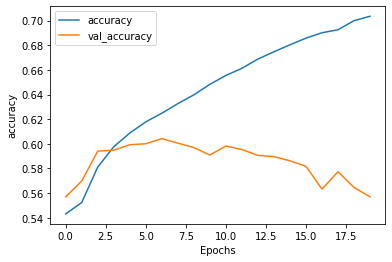

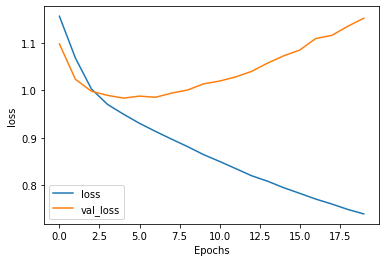

In [68]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [70]:
predsentence = [
                'tempatnya banyak sampah, petugas tidak ramah',
                'bersih dan rapi',
                'kotor',
                'jalan sulit dilalui',
                'pelayanan lama sekali',
                'puas',
                'sayang',
                'goblok',
                'bodoh',
                'terlalu ramai dan kotor'
                ]
predsequences = tokenizer.texts_to_sequences(predsentence)
predpadded = pad_sequences(predsequences,maxlen=max_length)
model.predict(predpadded)

array([[0.09072325, 0.07071651, 0.10340779, 0.29664296, 0.43850952],
       [0.00474253, 0.00416875, 0.05609726, 0.26077226, 0.67421925],
       [0.25535583, 0.25121418, 0.2945773 , 0.12839161, 0.07046102],
       [0.03048621, 0.02722715, 0.16671637, 0.28054595, 0.49502432],
       [0.03297455, 0.02487113, 0.1024695 , 0.2299301 , 0.6097547 ],
       [0.03205953, 0.0246952 , 0.07636915, 0.28385684, 0.58301926],
       [0.02398466, 0.02355369, 0.13533475, 0.38304108, 0.43408585],
       [0.04481314, 0.0356095 , 0.12556626, 0.26891539, 0.5250957 ],
       [0.07069743, 0.05682661, 0.16700096, 0.25964588, 0.4458291 ],
       [0.14334226, 0.20783105, 0.48445663, 0.13895284, 0.02541721]],
      dtype=float32)